#***Predictive Model For House Prices***

###**In This Project I will build a Prediction Model which helps us to predict the Price of a house according to its verious Features**

####**First , We install required libararies which used to make this model**

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

####***Now its time to import Our CSV file for this Model***

In [2]:
url = 'https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction'

# Download the data from Kaggle
!kaggle datasets download -d harishkumardatalab/housing-price-prediction

!unzip housing-price-prediction.zip

Dataset URL: https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction
License(s): CC0-1.0
  0% 0.00/4.63k [00:00<?, ?B/s]
100% 4.63k/4.63k [00:00<00:00, 8.68MB/s]
Archive:  housing-price-prediction.zip
  inflating: Housing.csv             


####***Now read the CSV file as a dataframe df using Pandas***

In [3]:
df = pd.read_csv('Housing.csv')

#Print first 15 values from the CSv to check That is the CSV is Correct or Not
print(df.head(15))

       price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0   13300000   7420         4          2        3      yes        no       no   
1   12250000   8960         4          4        4      yes        no       no   
2   12250000   9960         3          2        2      yes        no      yes   
3   12215000   7500         4          2        2      yes        no      yes   
4   11410000   7420         4          1        2      yes       yes      yes   
5   10850000   7500         3          3        1      yes        no      yes   
6   10150000   8580         4          3        4      yes        no       no   
7   10150000  16200         5          3        2      yes        no       no   
8    9870000   8100         4          1        2      yes       yes      yes   
9    9800000   5750         3          2        4      yes       yes       no   
10   9800000  13200         3          1        2      yes        no      yes   
11   9681000   6000         

####***To make our calculation easy we convert yes and no into 1 and 0***

In [12]:
df = df.replace({'yes': 1, 'no': 0}).infer_objects(copy=False)

print(df.head(15))

       price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0   13300000   7420         4          2        3         1          0   
1   12250000   8960         4          4        4         1          0   
2   12250000   9960         3          2        2         1          0   
3   12215000   7500         4          2        2         1          0   
4   11410000   7420         4          1        2         1          1   
5   10850000   7500         3          3        1         1          0   
6   10150000   8580         4          3        4         1          0   
7   10150000  16200         5          3        2         1          0   
8    9870000   8100         4          1        2         1          1   
9    9800000   5750         3          2        4         1          1   
10   9800000  13200         3          1        2         1          0   
11   9681000   6000         4          3        2         1          1   
12   9310000   6550         4         

#**Prepare data form model traning**

####***selection of Features and Target from the CSV for the model***

In [33]:
#for this fisrt we have to convert furnishingstatus column into int data type so the model takes the values from that other its shows error
df = df.replace({'furnished': 1, 'semi-furnished': 2,'unfurnished': 3}).infer_objects(copy=False)

In [35]:
#here x_data dataframe refers to the features which affect the model
#here y_data dataframe refers to the target value of the model
x_data = df.drop('price',axis=1)
y_data = df['price']

In [36]:
#print X_data and y_data

print(x_data)
print(y_data)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0              

####***Now we split the X_data and Y_data into test and train datas***

In [78]:
#here train data use to train the model and test data use to test the model after traning

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=10)

#**Bulding and Traning the Model**

#***Model = Linear Regression***

In [79]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

####***Now we store the predict value using by our model by gave x_test values to the model in Y_pred dataframe***

In [80]:
y_pred = model.predict(x_test)

####***get the accurasy score of the model***

In [81]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.7331102153370126


####***Now we make a graph scatter plot between predicted price and the real price***

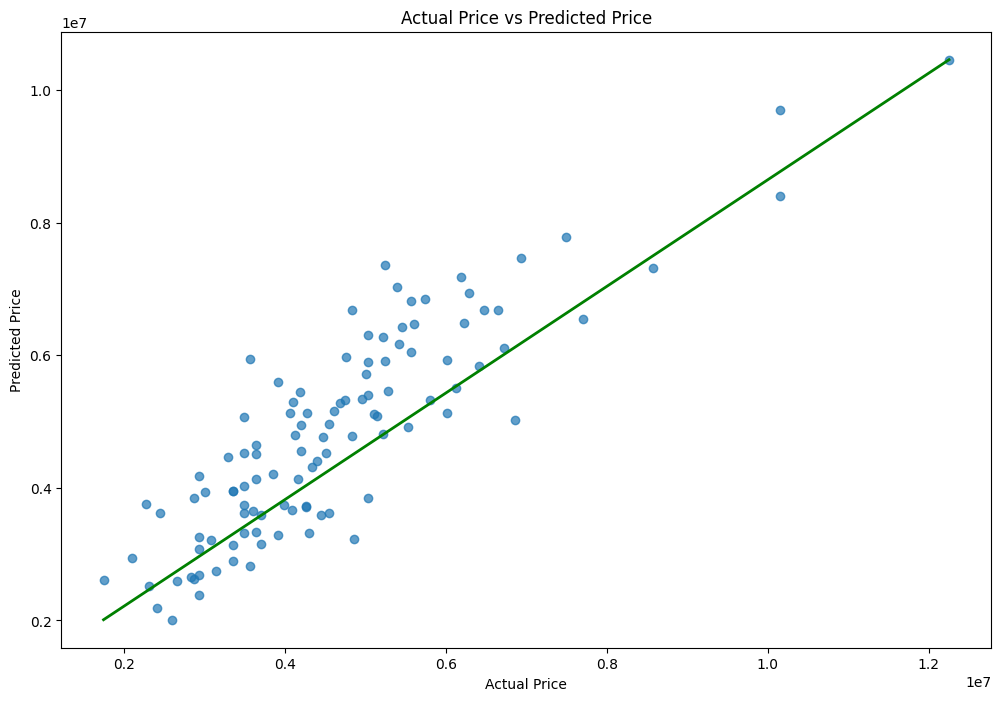

In [88]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred ,alpha=0.7)
plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)],'g', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

####***Now we use a user data to test our model that is it working or now and get the price from the model by gave it a user define values***

In [91]:
user_data = {
    'area' : 5568,
    'bedrooms' : 3,
    'bathrooms' : 3,
    'stories' : 1,
    'mainroad' : 0,
    'guestroom' : 1,
    'basement' : 0,
    'hotwaterheating' : 1,
    'airconditioning' : 1,
    'parking' : 0,
    'prefarea' : 0,
    'furnishingstatus' : 2
    }

user_df = pd.DataFrame(user_data,index=[0])

print(user_df)

   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  5568         3          3        1         0          1         0   

   hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                1                1        0         0                 2  


In [92]:
result = model.predict(user_df)
print(result)

[6891208.16629554]
